### The Email 

Hello! I am a young researcher in dire need of help. I have been struggling to finish my thesis because I tried to code in Python and honestly don't know why or how. Please help fix my code so I can graduate!!!

Regards,

A struggler

### The Problem

I am studying the relationship between married couples' depression levels (DEPRESS in the dataset) and their marital satisfaction (SAT in the dataset). My overall goals were to: 
* Create a function that computes the correlation between two variables (I know the math is right but the syntax is wrong). 
* Plot the relationship with depression on the x-axis and marital satisfaction on the y-axis. 
* Bootstrap the data to see if the correlation between the two variables is significant. 

Sadly, NONE of these are working and I'm out of options without your help. 

### The Data

The data are stored in a .csv file and there should only be 319 rows. You only need to worry about depression and satisfaction. I can't even read in the dang data! 

In [18]:
# load necessary libraries
import numpy as np
import builtins
from datascience import *
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

couples = Table.read_table("couples.csv")

In [19]:
#new = Table.with_columns(cope = )

def cor_test(data,col1,col2,decimals=4):
    """
    Computes the correlation between two variables. Inputs must be columns from a Table (or arrays). 
    Default arguments: None
    Required libraries: None
    """
    x = data.column(col1)
    y = data.column(col2)
    tot_tempx = 0; tot_tempy = 0; tot_cov = 0
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    for i in range(len(x)):
        temp_x = (x[i] - x_mean)**2
        tot_tempx = temp_x + tot_tempx
        temp_y = (y[i] - y_mean)**2
        tot_tempy = temp_y + tot_tempy
        tempcov = ((x[i] - x_mean) * (y[i] - y_mean))
        tot_cov = tempcov + tot_cov
    sdx = (tot_tempx/(len(x)-1))**0.5
    sdy = (tot_tempy/(len(y)-1))**0.5
    cov = tot_cov/(len(x)-1)
    corcoef = cov/(sdx*sdy)
    cor = float(round(corcoef, decimals))
    return cor
cor_test(couples, "DEPRESS","SAT",2)

-0.53

### Plot 

I want to make a plot for these variables. Why oh why!

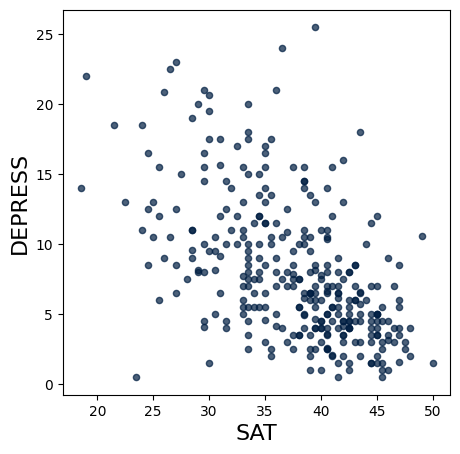

In [20]:
couples.scatter("SAT","DEPRESS")

### Bootstrapping

This one my advisor wanted me to do. I never had a chance. 

In [21]:
# create function to draw one bootstrap sample
def bootstrap_sample(data, col1 = "", col2 = ""):
    """ generates one bootstrap resample and computes correlation
    data = Table of data
    col1 and col2 = names of columns you're interested in from Table """
    subset = data.select(col1,col2)
    n = data.num_rows # obtain sample size for resamples
    bootsamp = subset.sample(n, with_replacement = True)
    return cor_test(bootsamp, col1,col2)

# set simulation/bootstrap parameters
B = 1000 # set number of bootstrap samples
boot_results = make_array() # create empty array to store results

# do this 1000 times to create empirical sampling distribution
for i in np.arange(B):
    boot_results = np.append(boot_results, bootstrap_sample(couples, "DEPRESS", "SAT"))

check = np.percentile(boot_results, [2.5, 97.5])
check

array([-0.6106 , -0.44896])

It looks to me like the results may not be significant, but I don't know how to interpret this confidence interval. Anyway, if you could also help me with that...

The 95% percentile bootstrap confidence interval for the correlation did not contain zero. This means we can reject the null that the correlation is zero at the alpha=.05 level. 